#Market Basket Analysis (Apriori Algorithm)

Market basket analysis merupakan metode yang digunakan untuk mengetahui hubungan antar produk dalam sebuah transaksi penjualan retail. Sesuai dengan namanya, metode ini berusaha menganalisa pembelian barang yang diletakkan dalam keranjang (basket). Dengan informasi yang didapat dari analisa ini, pembuat keputusan (dalam hal ini manajer) bisa membuat suatu kebijakan. Dalam penelitian yang akan dilakukan, informasi yang didapatkan akan dimanfaatkan oleh manajer *purchasing* atau bagian gudang untuk melakukan manajemen inventori. Untuk mendapatkan informasi yang valid, dibutuhkan data transaksi yang cukup besar. Data ini kemudian disimpan dalam suatu database untuk kemudian diolah lebih lanjut sehingga dihasilkan suatu pola hubungan antar produk yang dikenal dengan istilah *Interesting Rule*.
<br>
<br>
## Outline
<ul>
<li><a href="#install">Install Package</a></li>
<li><a href="#load">Load the Data</a></li>
<li><a href="#apriori">Apriori Algorithm</a></li>
<li><a href="#kesimpulan">Kesimpulan</a></li>
</ul>


***

<a id='install'></a>
## 1. Install Package

Sebelum melakukan *Market Basket Analysis* menggunakan *Apriori Algorithm*, maka perlu melakukan instalasi package agar metode yang akan digunakan dapat dilakukan. 

In [0]:
import pandas as pd
from mlxtend.preprocessing import OnehotTransactions       #Association
from mlxtend.frequent_patterns import apriori              #Apriori
from mlxtend.frequent_patterns import association_rules    #ARules

<a id='load'></a>
## 2. Load the Data
Kasus yang digunakan dalam melakukan *Market Basket Analysis* disini yaitu dengan menggunakan data perumpamaan, dimana terdapat transaksi 24 orang di salah satu toko dalam satu hari. Pada kasus kali ini, transaksi maksimal setiap orang yaitu sebanyak 3x. Untuk barang-barang apa saja yang dijual oleh toko, diantaranya adalah sebagai berikut. Barang-barang terdiri dari sembilan item yang berbeda.


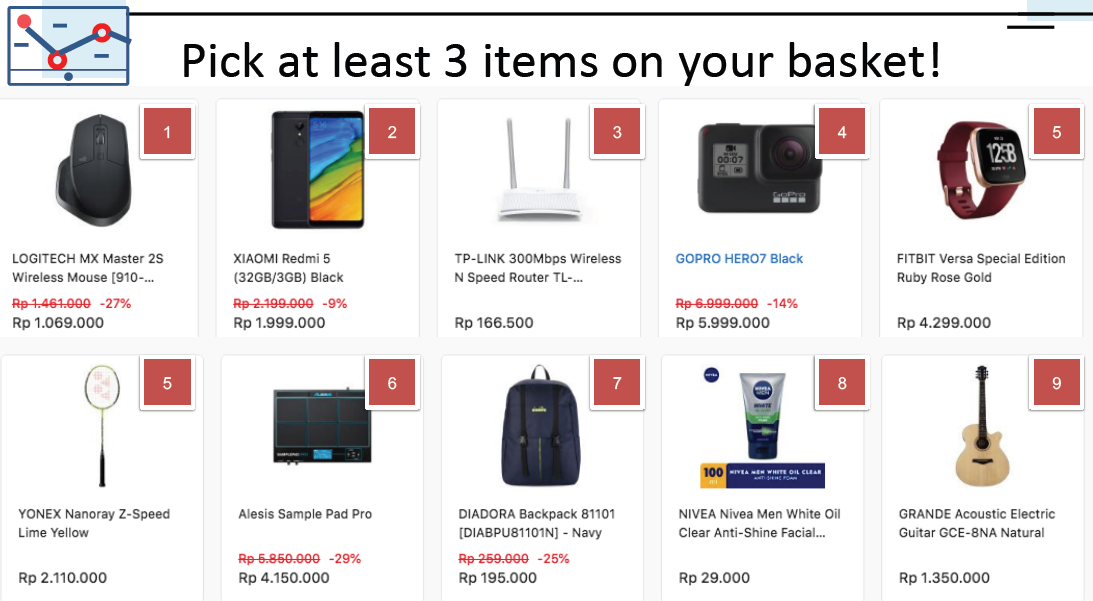

In [5]:
from IPython.display import Image                          #Import image
Image("store.jpg", width=600)

In [8]:
df = pd.read_csv('apriori_data.csv')
df.head()

,Timestamp,Name,Item 1,Item 2,Item 3
0,2019/09/17 8:58:22 AM GMT+7,Firdaus Adi Nugroho,HP,Racket,Watch
1,2019/09/17 8:58:24 AM GMT+7,faizah,HP,Camera,Watch
2,2019/09/17 8:58:30 AM GMT+7,andrem,Watch,Camera,Music Pad
3,2019/09/17 8:58:30 AM GMT+7,laili,Camera,Watch,Mouse
4,2019/09/17 8:58:33 AM GMT+7,Tara,HP,Watch,Music Pad


In [9]:
df = df.drop(['Timestamp','Name'], axis = 1)
df.head()

,Item 1,Item 2,Item 3
0,HP,Racket,Watch
1,HP,Camera,Watch
2,Watch,Camera,Music Pad
3,Camera,Watch,Mouse
4,HP,Watch,Music Pad


In [10]:
df1 = df[['Item 1','Item 2','Item 3']].values.tolist()
df1

[['HP', 'Racket', 'Watch'],
 ['HP', 'Camera', 'Watch'],
 ['Watch', 'Camera', 'Music Pad'],
 ['Camera', 'Watch', 'Mouse'],
 ['HP', 'Watch', 'Music Pad'],
 ['Watch', 'Racket', 'Camera'],
 ['HP', 'Camera', 'Watch'],
 ['Watch', 'Camera', 'Music Pad'],
 ['Racket', 'Soap', 'Guitar'],
 ['Racket', 'Camera', 'Guitar'],
 ['Camera', 'Bag', nan],
 ['Music Pad', 'Guitar', 'Camera'],
 ['Camera', 'Watch', nan],
 ['Guitar', 'Camera', 'Music Pad'],
 ['Camera', 'Watch', 'Music Pad'],
 ['Camera', 'Racket', 'Guitar'],
 ['Guitar', 'Camera', 'Watch'],
 ['Guitar', 'Watch', nan],
 ['Camera', 'Watch', nan],
 ['Soap', 'Bag', 'Guitar'],
 ['Router', 'Bag', nan],
 ['Watch', 'Racket', 'Soap'],
 ['Music Pad', 'Soap', 'Watch'],
 ['Mouse', 'Camera', 'Soap']]

In [0]:
dataset = [['HP', 'Racket', 'Watch'],
           ['HP', 'Camera', 'Watch'],
           ['Watch', 'Camera', 'Music Pad'],
           ['Camera', 'Watch', 'Mouse'],
           ['HP', 'Watch', 'Music Pad'],
           ['Watch', 'Racket', 'Camera'],
           ['HP', 'Camera', 'Watch'],
           ['Watch', 'Camera', 'Music Pad'],
           ['Racket', 'Soap', 'Guitar'],
           ['Racket', 'Camera', 'Guitar'],
           ['Camera', 'Bag'],
           ['Music Pad', 'Guitar', 'Camera'],
           ['Camera', 'Watch'],
           ['Guitar', 'Camera', 'Music Pad'],
           ['Camera', 'Watch', 'Music Pad'],
           ['Camera', 'Racket', 'Guitar'],
           ['Guitar', 'Camera', 'Watch'],
           ['Guitar', 'Watch'],
           ['Camera', 'Watch'],
           ['Soap', 'Bag', 'Guitar'],
           ['Router', 'Bag'],
           ['Watch', 'Racket', 'Soap'],
           ['Music Pad', 'Soap', 'Watch'],
           ['Mouse', 'Camera', 'Soap']]

<a id='apriori'></a>
## 3. Apriori Algorithm
Langkah pertama jika ingin mengaplikasikan Algoritma Apriori yaitu dengan melakukan logika dari pembentukan asosiasi
pada data. 
<br>
<br>
Melakukan pemisahan terhadap masing-masing ietem yang dibeli. Atau dapat dikatakan melakukan transformasi data, data yang sudah ada ditansformasikan agar lebih mudah dalam
efisensi dalam pengerjaan data set yang besar. Sehingga setelah melakukan transformasi dapat difenisikan berapa persen dari setiap barang yang dibeli dari tujuh transaksi yang dilakukan.

In [13]:
oht = OnehotTransactions()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df

/usr/local/lib/python3.6/dist-packages/mlxtend/preprocessing/onehot.py:66: DeprecationWarning: OnehotTransactions has been deprecated and will be removed in future. Please use TransactionEncoder instead.
  warnings.warn(msg, DeprecationWarning)


,Bag,Camera,Guitar,HP,Mouse,Music Pad,Racket,Router,Soap,Watch
0,False,False,False,True,False,False,True,False,False,True
1,False,True,False,True,False,False,False,False,False,True
2,False,True,False,False,False,True,False,False,False,True
3,False,True,False,False,True,False,False,False,False,True
4,False,False,False,True,False,True,False,False,False,True
5,False,True,False,False,False,False,True,False,False,True
6,False,True,False,True,False,False,False,False,False,True
7,False,True,False,False,False,True,False,False,False,True
8,False,False,True,False,False,False,True,False,True,False
9,False,True,True,False,False,False,True,False,False,False


#### 3.1 Result - Support

In [14]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
print (frequent_itemsets) 

     support                     itemsets
0   0.125000                        (Bag)
1   0.666667                     (Camera)
2   0.333333                     (Guitar)
3   0.166667                         (HP)
4   0.083333                      (Mouse)
5   0.291667                  (Music Pad)
6   0.250000                     (Racket)
7   0.208333                       (Soap)
8   0.625000                      (Watch)
9   0.208333             (Guitar, Camera)
10  0.083333                 (Camera, HP)
11  0.083333              (Camera, Mouse)
12  0.208333          (Camera, Music Pad)
13  0.125000             (Camera, Racket)
14  0.416667              (Camera, Watch)
15  0.083333          (Guitar, Music Pad)
16  0.125000             (Guitar, Racket)
17  0.083333               (Guitar, Soap)
18  0.083333              (Guitar, Watch)
19  0.166667                  (HP, Watch)
20  0.208333           (Music Pad, Watch)
21  0.083333               (Soap, Racket)
22  0.125000              (Racket,

#### 3.2 Result - Apriori Score

In [15]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Camera),(Mouse),0.666667,0.083333,0.083333,0.125000,1.5,0.027778,1.047619
1,(Mouse),(Camera),0.083333,0.666667,0.083333,1.000000,1.5,0.027778,inf
2,(Guitar),(Racket),0.333333,0.250000,0.125000,0.375000,1.5,0.041667,1.200000
3,(Racket),(Guitar),0.250000,0.333333,0.125000,0.500000,1.5,0.041667,1.333333
4,(HP),(Watch),0.166667,0.625000,0.166667,1.000000,1.6,0.062500,inf
5,(Watch),(HP),0.625000,0.166667,0.166667,0.266667,1.6,0.062500,1.136364
6,(Soap),(Racket),0.208333,0.250000,0.083333,0.400000,1.6,0.031250,1.250000
7,(Racket),(Soap),0.250000,0.208333,0.083333,0.333333,1.6,0.031250,1.187500
8,"(Guitar, Music Pad)",(Camera),0.083333,0.666667,0.083333,1.000000,1.5,0.027778,inf
9,(Camera),"(Guitar, Music Pad)",0.666667,0.083333,0.083333,0.125000,1.5,0.027778,1.047619


- confidence(A→C)=support(A→C)support(A),range: [0,1]
- lift(A→C)=confidence(A→C)support(C),range: [0,∞]
- levarage(A→C)=support(A→C)support(A)×support(C),range: [−1,1]
- conviction(A→C)=1−support(C)1−confidence(A→C),range: [0,∞]


<a id='kesimpulan'></a>
## 4. Kesimpulan

Berdasarkan output di atas, maka dapat diketahui bahwa item-item apa saja yang sering di beli. Baik itu item satuan, mapun pasangan antar item. Dikarenakan pada syntax menginginkan nilai minimun support adalah 0,05 maka hanya item dan kombinasi item dengan probabilitas 0,05 saja yang dimunculkan. Sehingga hal ini dapat disesuaikan dengan peneliti. Perhitungan ini sangat mudah untuk dilakukan jika data yang digunakan tidak banyak, seperti contoh yang dilakukan. Namun pada kenyataannya suatu transaksi di suatu toko pasti sangatlah banyak dan dengan barang yang sangat beragam. Untuk itu dengan menggunakan aplikasi ini akan sangat memudahkan dalam melakukan asosiasi dengan
tingkat data yang sangat besar.
<br>
Dengan menggunakan batasan nilai:
- support = 0,05
- lift = 1,5
<br>
Maka dapat ditemui beberapa kesimpulan diantaranya adalah sebagai berikut.
- Nilai Support tertinggi untuk 1 item :
 1. Camera - 66%
 2. Watch - 62%
 3. Guitar - 33%
<br>
- Nilai Support tertinggi untuk 2 item :
 1. Watch & Camera - 41%
 2. Watch & Music Pad; Camera & Music Pad; Camera & Guitar - 20%
 3. Watch & HP 16%
<br>
- Nilai Support tertinggi untuk 3 item :
 1. Watch & Music Pad & Camera - 12,5%
<br>
• [Confidence] Jika terdapat satu costumer yang membeli CAMERA maka peluang costumer itu juga akan mebeli MOUSE adalah 12% 
• [Lift]Menunjukkan angka 1,5, bahwa terdapat asosiasi yang cukup tinggi, dikarenakan jika semakin besar angka lift maka semakin besar pula asosiasi yang terbentuk. 
• [Leverage] Nilai ini menunjukkan perbedaan item set pada saat item dibeli bersamaan, serta menerangkan frekuensi yang diharapkan bila kedua item independen. Dikarenakan CAMERA dan MOUSE menunjukkan angka 0,02 pada nilai leverage maka kedua item independen. 
• [Confiction] Nilai ini menunjukkan kuat tidaknya hubungan antara item set. Makin tinggi nilai-nya, maka semakin kuat aosiasi kedua item set. Nilai confiction tertulis 1,04, maka menunjukkan peluang costumer mebeli CAMERA dan diserta membeli MOUSE tidak cukup tinggi.

Serta begitupula penjelasan untuk item set yang lainnya. Cara di atas merupakan logika berpikir dalam menjalankan *Association Rules* khususnya Apriori yang di contohkan pada pebelanjaan di toko X. Dan seperti yang telah dijelaskan sebelumnya, hal ini dapat diterapkan pada jumlah item yang sangat banyak ataupun di situasi manapun yang serupa, sehingga dengan mempelajari *Association Rules* dapat membuat suatu kebijakan ataupun strategi baru untuk meningkatkan efektifitas maupun profit pada kehiduapan sehari hari. 